In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

# Introduction

Singular Value Decomposition decompose a matrix in three other matrices. You can see these new matrices as *sub-transformations* of the space. Instead of doing the transformation in one movement, we decompose it in three movements. As a bonus, we will apply the SVD to image processing. Keep on reading!

# Singular Value Decomposition

<img src="images/unit-circle-transformation1.png" width="400" alt="Plot of the unit circle and its transformation" title="Transformation of the unit circle">
<em>The unit circle and its transformation by a matrix.</em>

The eigendecomposition can be done only for square matrices. The way to go to decompose other types of matrices that can't be decomposed with eigendecomposition is to use **Singular Value Decomposition** (SVD).

We will decompose ${A}$ into 3 matrices (instead of two with eigendecomposition):

<img src="images/singular-value-decomposition.png" width="300" alt="Illustration of the singular value decomposition" title="The singular value decomposition">
<em>The singular value decomposition</em>

The matrices ${U}$, ${D}$, and ${V}$ have the following properties:

- ${U}$ and ${V}$ are orthogonal matrices (${U}^\text{T}={U}^{-1}$ and ${V}^\text{T}={V}^{-1}$)

- ${D}$ is a diagonal matrix (all 0 except the diagonal. However ${D}$ is not necessarily square.

The columns of ${U}$ are called the left-singular vectors of ${A}$ while the columns of ${V}$ are the right-singular vectors of ${A}$. The values along the diagonal of ${D}$ are the singular values of ${A}$.


Here are the dimensions of the factorization:

<img src="images/singular-value-decomposition-understanding-dimensions.png" width="300" alt="Dimensions of the singular value decomposition (SVD)" title="The dimensions of the singular value decomposition (SVD)">
<em>The dimensions of the singular value decomposition</em>


The diagonal matrix of singular values is not square but has the shape of ${A}$. Look at the example provided in the [Numpy doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) to see that they create a matrix of zeros with the same shape as ${A}$ and fill it with the singular values:

```python
s_mat = np.zeros((9, 6), dtype=complex)
s_mat[:6, :6] = np.diag(s)
```




# Intuition

Here are several examples showing how the space can be transformed by 2D square matrices. Hopefully, this will lead to a better understanding of this statement:

<span class='pquote'>
    ${A}$ is a matrix that can be seen as a linear transformation. This transformation can be decomposed in three sub-transformations: 1. rotation, 2. re-scaling, 3. rotation. These three steps correspond to the three matrices ${U}$, ${D}$, and ${V}$.
</span>

### Every matrix can be seen as a linear transformation

You can see a matrix as a specific linear transformation. When you *apply* this matrix to a vector or to another matrix you will apply this linear transformation to it.

### Example 1.

We will modify the vector:

$$
{v}=\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}
$$

by applying the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

We will have:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x + 0y\\\\
    0x + 2y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

We see that applying the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

just doubled each coordinate of our vector. Here are the graphical representation of ${v}$ and its transformation ${w}$:

<img src="images/transformation-vector-by-matrix.png" width="400" alt="Plot of a vector and its transformation" title="The matrix increased both coordinates of the vector">
<em>Applying the matrix on the vector multiplied each coordinate by two</em>

You can look at other examples of simple transformations on vectors and unit circle in [this playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).


### Example 2.

To represent the linear transformation associated with matrices we can also draw the unit circle and see how a matrix can transform it. The unit circle represents the coordinates of every unit vectors (vector of length 1).

<img src="images/unit-circle.png" width="200" alt="Representation of the unit circle" title="The unit circle">
<em>The unit circle</em>

It is then possible to apply a matrix to all these unit vectors to see the kind of deformation it will produce.

Again, let's apply the matrix:

$$
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to the unit circle:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    2x\\\\
    2y
\end{bmatrix}
$$

<img src="images/unit-circle-transformation.png" width="400" alt="Representation of the unit circle and its transformation" title="The unit circle and its transformation">
<em>Another representation of the effect of the matrix: each coordinate of the unit circle was multiplied by two</em>

We can see that the matrix doubled the size of the circle. But in some transformations, the change applied to the $x$ coordinate is different from the change applied to the $y$ coordinate. Let's see what it means graphically.

### Example 3.

We will apply the matrix:

$$
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}
$$

to the unit circle:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3 & 0\\\\
    0 & 2
\end{bmatrix}\cdot
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
$$

This gives the following new circle:

<img src="images/unit-circle-transformation1.png" width="400" alt="Representation of the unit circle and its transformation" title="The unit circle and its transformation">
<em>This time the matrix didn't rescale each coordinate with the same weight</em>

We can check that with the equations associated with this matrix transformation. Let's say that the coordinates of the new circle (after transformation) are $x'$ and $y'$. The relation between the old coordinates ($x$, $y$) and the new coordinates ($x'$, $y'$) is:

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    3x\\\\
    2y
\end{bmatrix}
\Leftrightarrow
\begin{cases}
x=\frac{x'}{3}\\\\
y=\frac{y'}{2}
\end{cases}
$$

We also know that the equation of the unit circle is $x^2+y^2=1$ (the norm of the unit vectors is 1, see [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/)). By replacement we end up with:

$$
\begin{align*}
\left(\frac{x'}{3}\right)^2 + \left(\frac{y'}{2}\right)^2 = 1\\\\
\left(\frac{y'}{2}\right)^2 = 1 - \left(\frac{x'}{3}\right)^2\\\\
\frac{y'}{2} = \sqrt{1 - \left(\frac{x'}{3}\right)^2}\\\\
y' = 2\sqrt{1 - \left(\frac{x'}{3}\right)^2}
\end{align*}
$$

We can check that this equation corresponds to our transformed circle. Let's start by drawing the old circle. Its equation is:

$$
\begin{align*}
x^2+y^2=1\\\\
y^2=1-x^2\\\\
y=\sqrt{1-x^2}
\end{align*}
$$

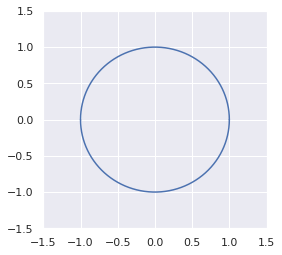

In [5]:
def plot_circle():
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))
    plt.plot(x, y, sns.color_palette().as_hex()[0])
    plt.plot(x, -y, sns.color_palette().as_hex()[0])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.show()
plot_circle()

So far so good!

*Coding tip*: You can see the trick to plot a circle here: you create the $x$ variable, then $y$ is defined from $x$. This means that for each $x$, the corresponding $y$ value is calculated (and thus $y$ has the same shape as $x$). Since the result of the square root can be negative or positive (for instance, 4 can be the result of $2^2$ but also of $(-2)^2$) we need to plot both solutions ($y$ and $-y$ in `plt.plot`). Note also that a lot of values are needed if we want the connection between the two demi-spheres.


Now let's add the circle obtained after matrix transformation. We saw that it is defined with

$$
y = 2\sqrt{1 - \left(\frac{x}{3}\right)^2}
$$

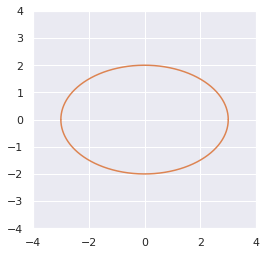

In [6]:
def plot_ellipse():
    x1 = np.linspace(-3, 3, 100000)
    y1 = 2*np.sqrt(1-((x1/3)**2))
    plt.plot(x1, y1, sns.color_palette().as_hex()[1])
    plt.plot(x1, -y1, sns.color_palette().as_hex()[1])
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()
plot_ellipse()

This shows that our transformation was correct.

Note that these examples used **diagonal matrices** (all zeros except the diagonal). The general rule is that the transformation associated with diagonal matrices imply only a rescaling of each coordinate **without rotation**. This is a first element to understand the SVD. Look again at the decomposition

<img src="images/singular-value-decomposition.png" width="300">


The transformation associated with diagonal matrices imply only a rescaling of each coordinate **without rotation**


We saw that the matrix ${D}$ is a diagonal matrix. And we saw also that it corresponds to a rescaling without rotation.




### Example 4. rotation matrix

Matrices that are not diagonal can produce a rotation (see more details [here](https://en.wikipedia.org/wiki/Rotation_matrix)). Since it is easier to think about angles when we talk about rotation, we will use a matrix of the form

$$
R=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
$$

This matrix will rotate our vectors or matrices counterclockwise through an angle $\theta$. Our new coordinates will be

$$
\begin{bmatrix}
    x'\\\\
    y'
\end{bmatrix}=
\begin{bmatrix}
    cos(\theta) & -sin(\theta)\\\\
    sin(\theta) & cos(\theta)
\end{bmatrix}
\begin{bmatrix}
    x\\\\
    y
\end{bmatrix}=
\begin{bmatrix}
    xcos(\theta) - ysin(\theta)\\\\
    xsin(\theta) + ycos(\theta)
\end{bmatrix}
$$

Let's rotate some vectors through an angle of $\theta = 45^\circ$.

Let's start with the vector ${u}$ of coordinates $x=0$ and $y=1$ and the vector ${v}$ of coordinates $x=1$ and $y=0$. The vectors ${u'}$ ${v'}$ are the rotated vectors.

<img src="images/unit-vectors-rotation.png" width="200" alt="Rotation of the unit vectors through matrix operation" title="Rotation of the unit vectors">
<em>Counter clockwise rotation of the unit vectors with $\theta = 45^\circ$</em>

First, let's plot ${u}$ and ${v}$.

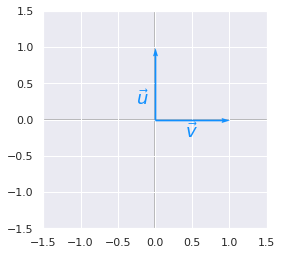

In [7]:
orange = '#FF9A13'
blue = '#1190FF'
    
u = [1,0]
v = [0,1]

plotVectors([u, v], cols=[blue, blue])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.2, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18)
plt.show()

They are the basis vectors<a href="https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab">(watch this playlist for understanding basis vectors)</a> of our space. We will calculate the transformation of these vectors:

$$
\begin{cases}
u_x = 0\cdot cos(45) - 1\cdot sin(45)\\\\
u_y = 0\cdot sin(45) + 1\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
u_x = -sin(45)\\\\
u_y = cos(45)
\end{cases}
$$

$$
\begin{cases}
v_x = 1\cdot cos(45) - 0\cdot sin(45)\\\\
v_y = 1\cdot sin(45) + 0\cdot cos(45)
\end{cases}
\Leftrightarrow
\begin{cases}
v_x = cos(45)\\\\
v_y = sin(45)
\end{cases}
$$

We will now plot these new vectors to check that they are well our basis vectors rotated through an angle of $45^\circ$.

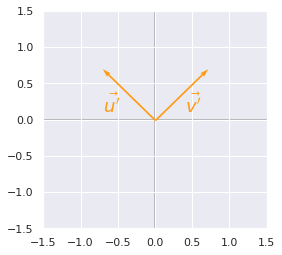

In [8]:
u1 = [-np.sin(np.radians(45)), np.cos(np.radians(45))]
v1 = [np.cos(np.radians(45)), np.sin(np.radians(45))]

plotVectors([u1, v1], cols=[orange, orange])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.7, 0.1, r"$\vec{u'}$", color=orange, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=orange, size=18)
plt.show()

*Coding tip:* the numpy functions `sin` and `cos` take input in radians. We can convert our angle from degrees to radians with the function `np.radians()`.

We can also transform a circle. We will take a rescaled circle (the one from the example 3.) to be able to see the effect of the rotation.

<img src="images/rescaled-circle-rotated.png" width="300" alt="A rescaled circle (not the same hight and width) rotated" title="Rescaled circle rotated">
<em>The effect of a rotation matrix on a rescaled circle</em>

/home/sanchit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


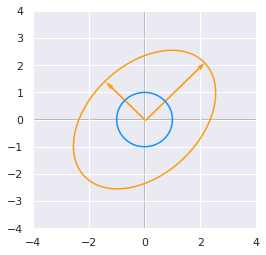

[array([-3.     , -2.99994, -2.99988, ...,  2.99988,  2.99994,  3.     ]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan])]

In [9]:
def transform_circle():
    '''
    # Generate 100000 points between -3 and 3. Relate x and y for an ellipse
    x = 
    y = 
    
    # Generate positive x, y coordinates for the rotated ellipse
    x1 = 
    y1 = 

    # Generate negative x, y coordinates for the rotated ellipse
    x1_neg = 
    y1_neg = 
    
    
    return a list in the order [x,y,x1,y1,x1_neg,y1_neg]
    
    '''
    x = np.linspace(-3,3,100000)
    y = np.sqrt(1-((x)**2))
    # YOUR CODE HERE
#     raise NotImplementedError()
    
    u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
    v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]
    x1 = u1[0]*x + v1[0]*y
    y1 = u1[1]*x + v1[1]*y
    x1_neg = u1[0]*x -v1[0]*y
    y1_neg = u1[1]*x - v1[1]*y
#     print(y1,"y1")
    plotVectors([u1, v1], cols=['#FF9A13', '#FF9A13'])

    plt.plot(x, y, '#1190FF')
    plt.plot(x, -y, '#1190FF')
    plt.plot(x1, y1, '#FF9A13')
    plt.plot(x1_neg, y1_neg, '#FF9A13')

    plt.xlim(-4, 4)
    plt.ylim(-4,4)
    plt.show()
    
    return [x,y,x1,y1,x1_neg,y1_neg]

transform_circle()

In [10]:
# HIDDEN TEST CASE - DO NOT ALTER THIS CELL

We can see that the circle has been rotated by an angle of $45^\circ$. We have chosen the length of the vectors from the rescaling weight from example 3 (factor 3 and 2) to match the circle.

### Summary

I hope that you got how vectors and matrices can be transformed by rotating or scaling matrices. The SVD can be seen as the decomposition of one complex transformation in 3 simpler transformations (a rotation, a scaling and another rotation).

Note that we took only square matrices. The SVD can be done even with non square matrices but it is harder to represent transformation associated with non square matrices. For instance, a 3 by 2 matrix will map a 2D space to a 3D space.

<img src="images/non-square-matrix-change-dimensions.png" width="250" alt="A non square matrix change the number of dimensions of the input" title="Example of a change of dimensions">
<em>A non square matrix change the number of dimensions of the input</em>




# The three transformations

Now that the link between matrices and linear transformation is clearer we can check that a transformation associated with a matrix can be decomposed with the help of the SVD.

But first let's create a function that takes a 2D matrix as an input and draw the unit circle transformation when we apply this matrix to it. It will be useful to visualize the transformations.

In [11]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))
    
    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y
    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    
    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

We can use it to check that the three transformations given by the SVD are equivalent to the transformation done with the original matrix. We will also draw each step of the SVD to see the independant effect of the first rotation, the scaling and the second rotation.

We will use the matrix:

$$
{A}=\begin{bmatrix}
    3 & 7\\\\
    5 & 2
\end{bmatrix}
$$

and plot the unit circle and its transformation by ${A}$:

Unit circle:


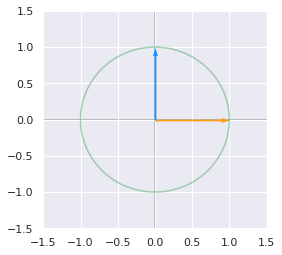

Unit circle transformed by A:


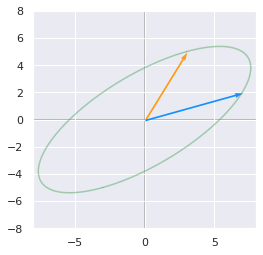

In [12]:
A = np.array([[3, 7], [5, 2]])

print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

This is what we get when we apply the matrix ${A}$ to the unit circle and the basis vectors. We can see that the two base vectors are not necessarily rotated the same way. This is related to the sign of the determinant of the matrix.

Let's now compute the SVD of ${A}$:

In [59]:
def find_svd(A):
    
    '''
    A: numpy array
    return the sigular value decomposition of A
    '''
    # YOUR CODE HERE
    U,D,V = np.linalg.svd(A,full_matrices = False)
    return U,D,V
    raise NotImplementedError()

In [60]:
A = np.array([[3, 7], [5, 2]])
find_svd(A)

(array([[-0.85065081, -0.52573111],
        [-0.52573111,  0.85065081]]),
 array([8.71337969, 3.32821489]),
 array([[-0.59455781, -0.80405286],
        [ 0.80405286, -0.59455781]]))

In [15]:
# HIDDEN TEST CASE - DO NOT ALTER THIS CELL

We can now look at the sub-transformations by looking at the effect of the matrices ${U}$, ${D}$ and ${V}$ in the reverse order. Note that it returns the right singular vector **already transposed** (see the [doc](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html)).

Unit circle:


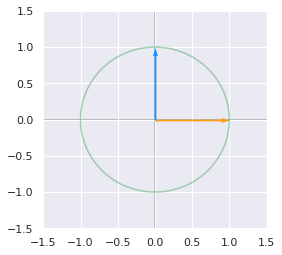

First rotation:


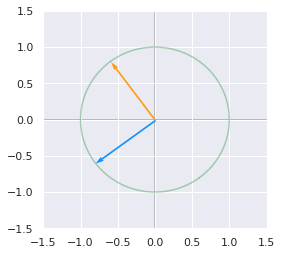

Scaling:


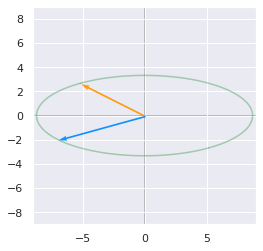

Second rotation:


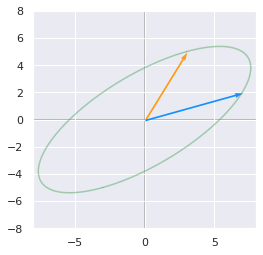

In [16]:
# Unit circle

U, D, V = find_svd(A)

print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print ('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Just to be sure, you can compare this last step with the transformation by ${A}$. Fortunately, you will see that the result is the same:

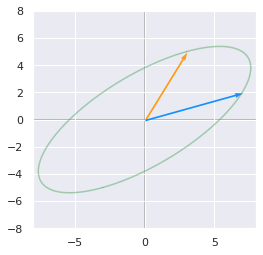

In [17]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## Singular values, error images and compression ratio

 - Reconstruct image using the first r singular values of the SVD
 - Calculate the data compression ratio for each of the images
 - The name of the images are test_svd1.png and test_svd.png

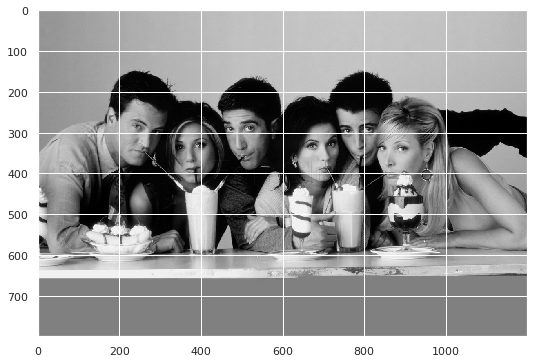

In [31]:
img = Image.open('test_svd_1.jpg').convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(img)

In [55]:
# Convert the image to a numpy matrix
def raw_image_to_matrix(path):
    '''
    # convert image to grayscale
    # convert to numpy array
    # Reshape according to orginal image dimensions (as Image function take image of size (height,width) and 
    # loads it as (width,height) )
    
    path: the path to the image
    return: final version of the image matrix (band=0)
    '''
    img = Image.open(path).convert('L')
    mat = np.asarray(img)
    mat = mat.reshape(mat.shape[1],mat.shape[0])
    return mat
    # YOUR CODE HERE
    raise NotImplementedError()

l = raw_image_to_matrix('test_svd.jpg')
l.shape

(1000, 669)

In [21]:
# HIDDEN TEST CASE - DO NOT ALTER THIS CELL
l = raw_image_to_matrix('test_svd.jpg')

In [37]:
def compression_ratio(i, m, n):
    comp_bytes = i * (m + n) + i
    compression = (comp_bytes / (m * n)) * 100
    return compression * 100

In [97]:
def image_reconstruction(imgmat):
    # sigma has all singular values of the img
    U, sigma, V = find_svd(imgmat)

    # dimensions of the matrix
    m = float(imgmat.shape[0])
    n = float(imgmat.shape[1])
    reconstructions = []
    for i in range(5, 56, 10):
        # Reconstruct image from the U, sigma, V matrices.
        # YOUR CODE HERE
        reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
#         raise NotImplementedError()
        
        
        cr = compression_ratio(i, m, n)

        fig = plt.figure(figsize=(12, 6))
        fig.subplots_adjust(hspace=0.4, wspace=0.4)

        plt.subplot(1, 2, 1)
        plt.imshow(reconstimg, cmap='gray')
        title = "r = %s" % i
        plt.title(title)

        plt.subplot(1, 2, 2)
        errorimg = imgmat - reconstimg
        plt.imshow(errorimg, cmap='gray')
        title = "error image for r = %s" % i
        plt.title(title)

        plt.show()

        print("Compression ratio: %.2f" %cr + str('%'))
        print('')
    return reconstructions

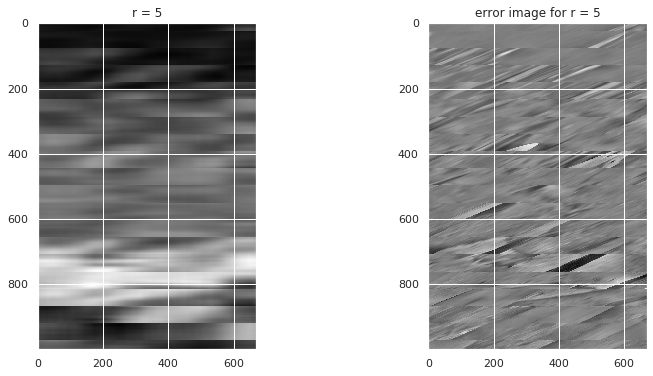

Compression ratio: 124.81%



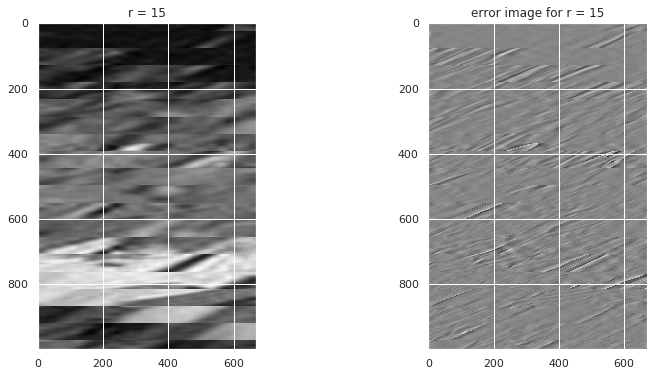

Compression ratio: 374.44%



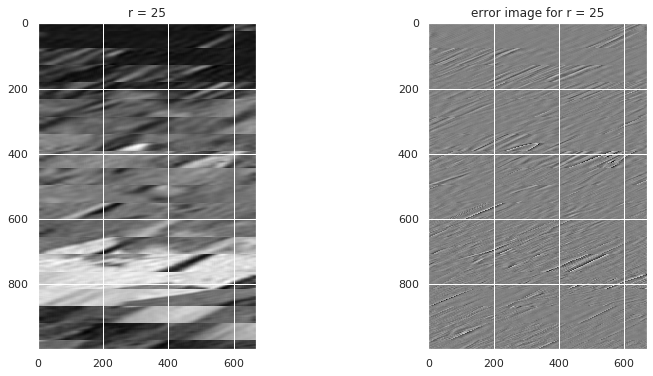

Compression ratio: 624.07%



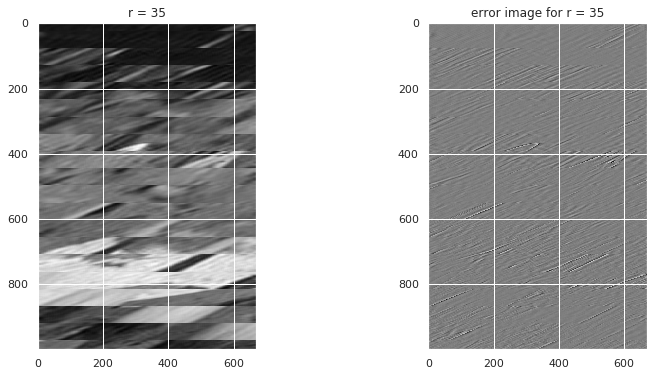

Compression ratio: 873.69%



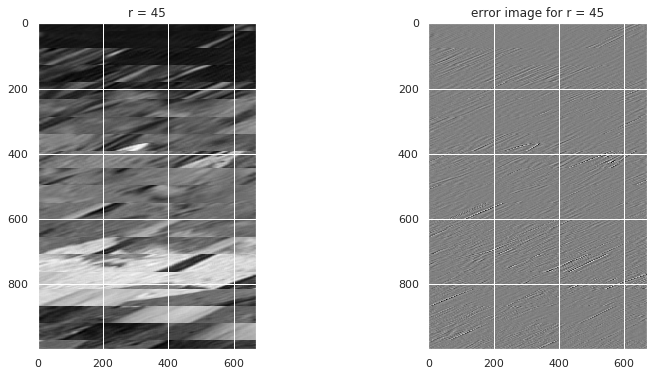

Compression ratio: 1123.32%



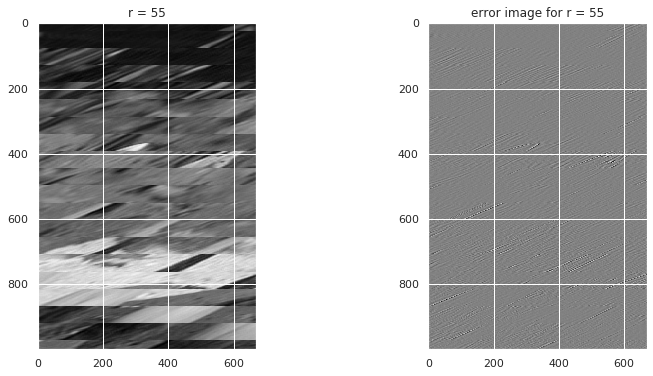

Compression ratio: 1372.94%



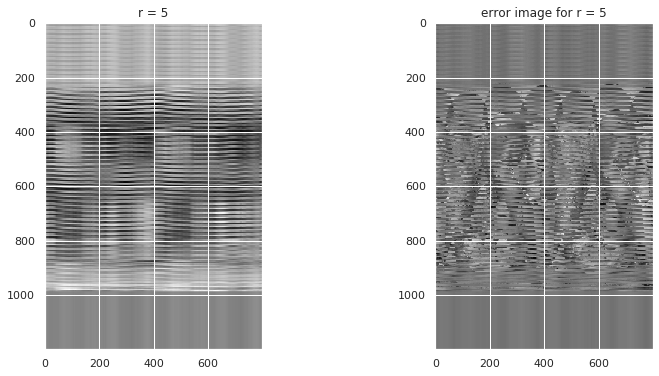

Compression ratio: 104.22%



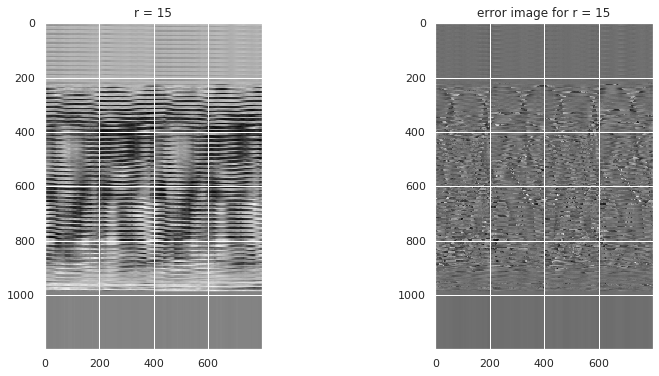

Compression ratio: 312.66%



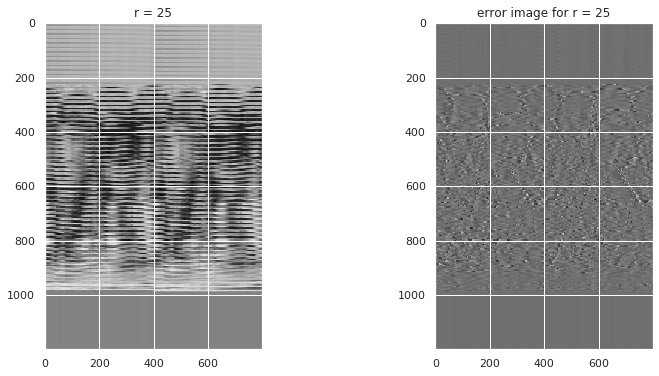

Compression ratio: 521.09%



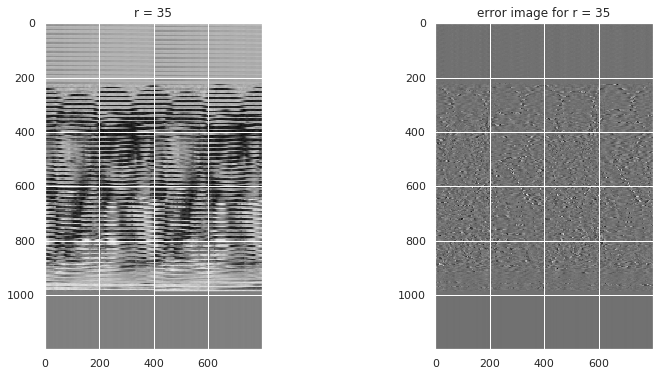

Compression ratio: 729.53%



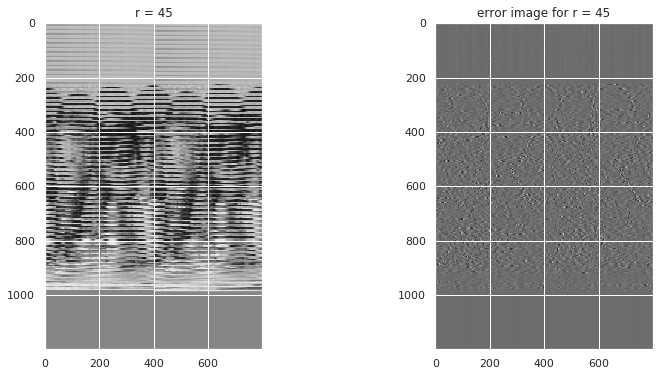

Compression ratio: 937.97%



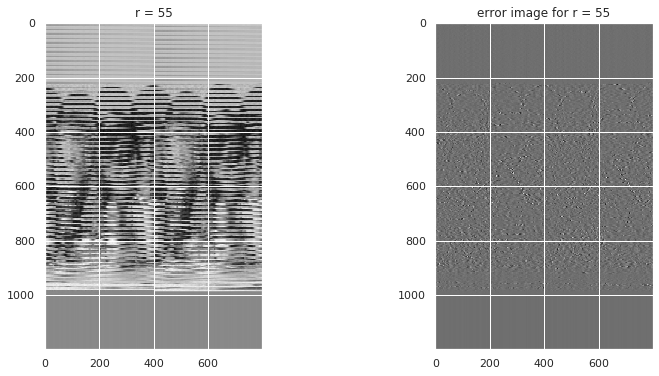

Compression ratio: 1146.41%



In [102]:
# l = raw_image_to_matrix('test_svd.jpg')
# l = image_reconstruction(l)

# l1 = raw_image_to_matrix('test_svd_1.jpg')
# l1 = image_reconstruction(l1)

In [99]:
# (U[:,:2]).shape,sigma[:2].shape,np.matrix(V[:2,:]).shape
# # (U[:,:2]*sigma[:2]).shape
# x=(U[:,:2]*(sigma[:2]))
# y = np.matrix(V[:2,:])
# y.shape

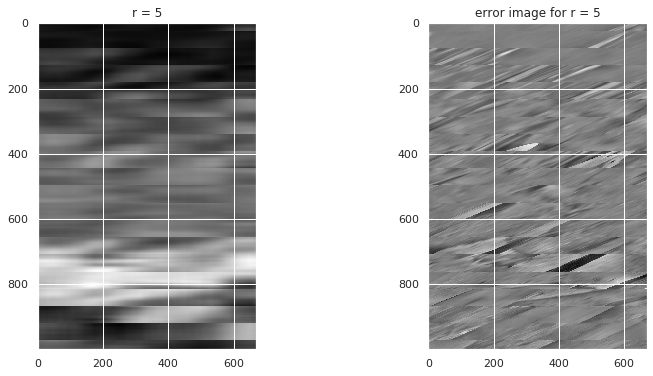

Compression ratio: 124.81%



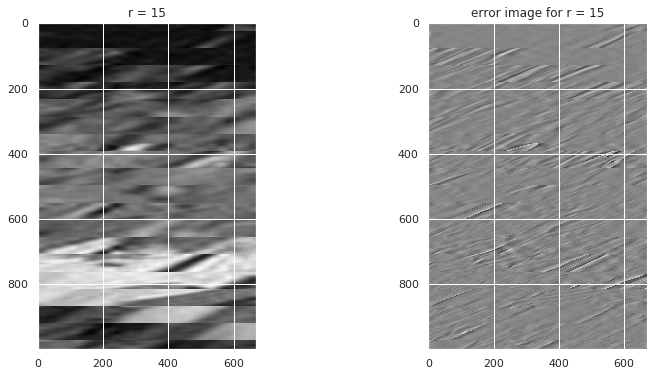

Compression ratio: 374.44%



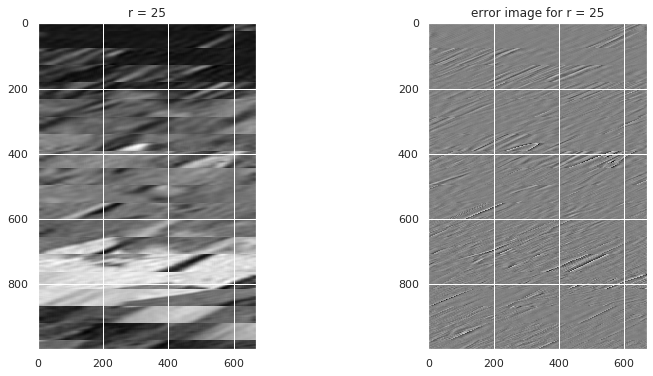

Compression ratio: 624.07%



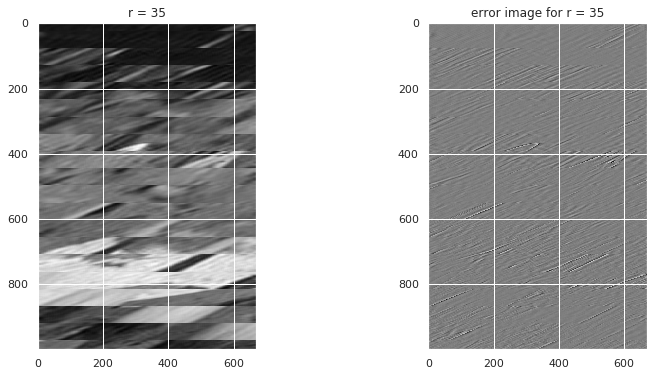

Compression ratio: 873.69%



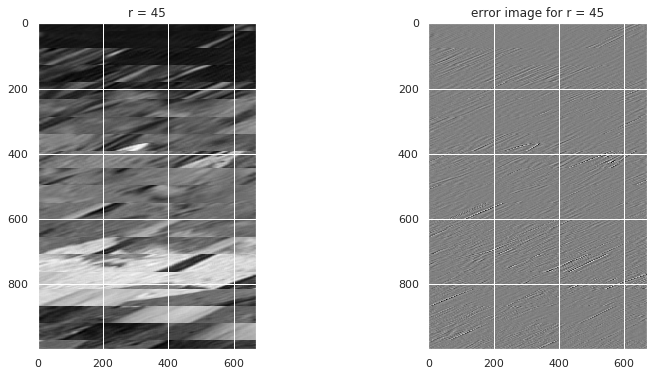

Compression ratio: 1123.32%



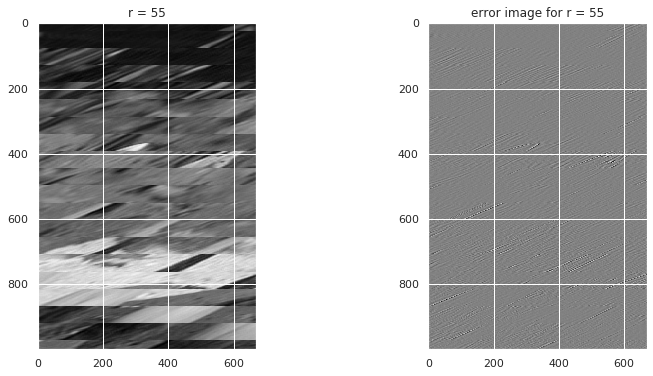

Compression ratio: 1372.94%



FileNotFoundError: [Errno 2] No such file or directory: 'test_svd1.png'

In [100]:
l = raw_image_to_matrix('test_svd.jpg')
l = image_reconstruction(l)

l1 = raw_image_to_matrix('test_svd1.png')
l1 = image_reconstruction(l1)

#The hidden test cases will check the proper reconstruction of the given images
#you will also be able to see the outputs
